# Programming Exercise 1: Linear Regression with One Variable

> En este ejercicio, implementará la regresión lineal y verá cómo funciona con los datos.

## 1. Linear Regression with One Variable

>En esta parte del ejercicio, implementarás regresión lineal con una variable para predecir las ganancias de un camión de comida. Supón que eres el director ejecutivo (CEO) de una franquicia de restaurantes y estás considerando diferentes ciudades para abrir una nueva sucursal. La cadena ya tiene camiones en varias ciudades y cuentas con datos sobre las ganancias y las poblaciones de esas ciudades. Te gustaría usar estos datos para ayudarte a decidir en qué ciudad expandirte a continuación.

El archivo ex1data1.txt contiene el conjunto de datos para nuestro problema de regresión lineal. La primera columna representa la población de una ciudad y la segunda columna representa la ganancia de un camión de comida en esa ciudad. Un valor negativo en las ganancias indica una pérdida.

### 1.1 Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/StevenB2025/Machine_learning_ejercicio_1/refs/heads/main/PUBLICIDAD_VENTAS.csv'
df = pd.read_csv(url, sep=",")
df.head()

,ID,TV,RADIO,NEWSPAPER,SALES,VENTAS ALTAS Y BAJAS
0,1,230.1,37.8,69.2,22.1,1
1,2,44.5,39.3,45.1,10.4,0
2,3,17.2,45.9,69.3,9.3,0
3,4,151.5,41.3,58.5,18.5,1
4,5,180.8,10.8,58.4,12.9,0


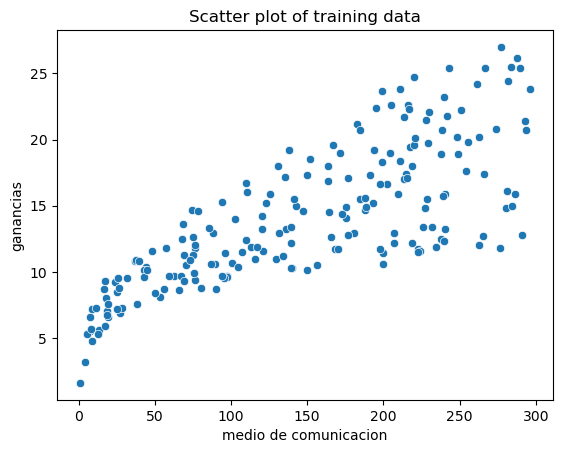

In [3]:
ax = sns.scatterplot(x='TV', y='SALES', data=df)
ax.set(xlabel='medio de comunicacion', ylabel='ganancias', title='Scatter plot of training data');
# Mostrar el gráfico
plt.show()

### 1.2 Gradient Descent

Fit the linear regression parameters $\theta$ to the dataset using gradient descent

#### 1.2.1 Ecuaciones


 hipothesis of  regresión linear es :

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

El objetivo de la regresión lineal es minimizar la función de costo (Error Cuadrático Medio - RMSE):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

Para minimizar el costo $J(\theta)$  usaremos el algoritmo de descenso por gradiente por lotes (batch gradient descent). En cada iteración se realiza la siguiente actualización:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

(Simultaneamente  $\theta_j$ for all $j$). con cada paso tus paramestros  $\theta_j$ se acerca al valor optimo que minimiza  $J(\theta)$.

#### 1.2.2 Implementacion

Necesitamos adiocionar otra dimencion, columnas de unos para  $\theta_0$ termino del intercepto. esto permite tratar  $\theta_0$ como otra variable 

La trama muestra que tienen una relación lineal.

In [83]:
# Número de muestras (filas) en el DataFrame
m = df.shape[0]  # Construcción de la matriz de características X:
print(m)
# Se agrega una columna de unos (para el término independiente) y se concatena con la variable 'TV'
X = np.hstack((np.ones((m,1)), df.TV.values.reshape(-1,1)))
print(X)
# Vector de salida/etiqueta y: se convierte la columna 'sales' en un vector columna
y = np.array(df.SALES.values).reshape(-1,1)
print(y)
# Inicialización del vector de parámetros theta con ceros (dimensión: número de características + 1)
theta = np.zeros(shape=(X.shape[1],1))
print(theta)
# Número de iteraciones para el algoritmo de descenso por gradiente
iterations = 1500
print(iterations)
# Tasa de aprendizaje (learning rate)
alpha = 0.0000001
print(alpha)
###$$$$$ ### POr favor imprimir cada cambio 

200
[[  1.  230.1]
 [  1.   44.5]
 [  1.   17.2]
 [  1.  151.5]
 [  1.  180.8]
 [  1.    8.7]
 [  1.   57.5]
 [  1.  120.2]
 [  1.    8.6]
 [  1.  199.8]
 [  1.   66.1]
 [  1.  214.7]
 [  1.   23.8]
 [  1.   97.5]
 [  1.  204.1]
 [  1.  195.4]
 [  1.   67.8]
 [  1.  281.4]
 [  1.   69.2]
 [  1.  147.3]
 [  1.  218.4]
 [  1.  237.4]
 [  1.   13.2]
 [  1.  228.3]
 [  1.   62.3]
 [  1.  262.9]
 [  1.  142.9]
 [  1.  240.1]
 [  1.  248.8]
 [  1.   70.6]
 [  1.  292.9]
 [  1.  112.9]
 [  1.   97.2]
 [  1.  265.6]
 [  1.   95.7]
 [  1.  290.7]
 [  1.  266.9]
 [  1.   74.7]
 [  1.   43.1]
 [  1.  228. ]
 [  1.  202.5]
 [  1.  177. ]
 [  1.  293.6]
 [  1.  206.9]
 [  1.   25.1]
 [  1.  175.1]
 [  1.   89.7]
 [  1.  239.9]
 [  1.  227.2]
 [  1.   66.9]
 [  1.  199.8]
 [  1.  100.4]
 [  1.  216.4]
 [  1.  182.6]
 [  1.  262.7]
 [  1.  198.9]
 [  1.    7.3]
 [  1.  136.2]
 [  1.  210.8]
 [  1.  210.7]
 [  1.   53.5]
 [  1.  261.3]
 [  1.  239.3]
 [  1.  102.7]
 [  1.  131.1]
 [  1.   69. ]
 [  1.

#### 1.2.3 Calculando la Funcion de Costo $J(\theta)$

In [84]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [85]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 100')

With theta = [0 ; 0]
Cost computed = 111.858125
Expected cost value (approx) 100


In [86]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 50000')

With theta = [-1 ; 2]
Cost computed = 52922.39612500001
Expected cost value (approx) 50000


#### 1.2.4 Gradiente Descendiente
es un algoritmo de optimización genérico que mide el gradiente local de la función de costo con respecto al parámetro $\theta$ 
y avanza en la dirección del gradiente descendente.

Algoritmo:

repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Tasa de aprendizaje demasiado pequeña: descenso de gradiente lento
* Tasa de aprendizaje demasiado grande: el descenso del gradiente puede sobrepasar el mínimo y puede no converger

In [87]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = y.shape[0]
    J_history = np.zeros(shape=(iterations, 1))

    for i in range(0, iterations):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

In [91]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx):\n 1\n  1')

Theta found by gradient descent:
 [[0.00149134]
 [0.08324235]]
Expected theta values (approx):
 1
  1


#### Plot the linear fit:

### 1.3 Visualizing $J(\theta)$

La función de costo $J(\theta)$ tiene forma de cuenco y posee un mínimo global. Este mínimo es el punto óptimo para $\theta_0$ y $\theta_1$, y cada paso del descenso por gradiente se acerca a ese punto.


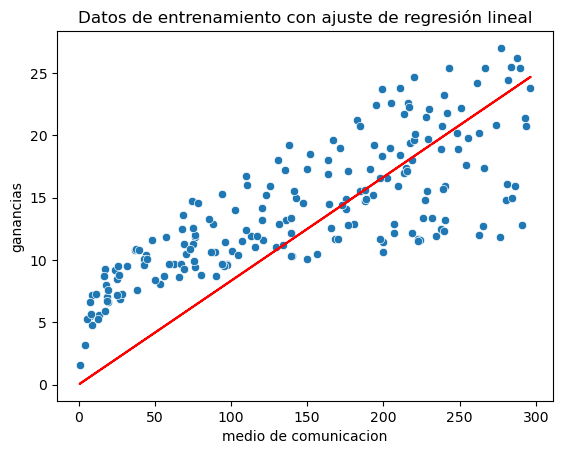

In [127]:
ax = sns.scatterplot(x='TV', y='SALES', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='medio de comunicacion', ylabel='ganancias', title='Datos de entrenamiento con ajuste de regresión lineal');

In [129]:
y_pred = np.array([1, 0.1]).dot(theta)
f'For population = 100, we predict a profit of {y_pred[0]*10000}'

'For population = 100, we predict a profit of 98.15576339837455'

In [130]:
y_pred = np.array([1, 200]).dot(theta)
f'For population = 200, we predict a profit of {y_pred[0]*10000}'

'For population = 200, we predict a profit of 166499.60419256572'

In [123]:
theta0_vals = np.linspace(-100, 100, 10)
theta1_vals = np.linspace(-1, 1, 100)

In [124]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [125]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

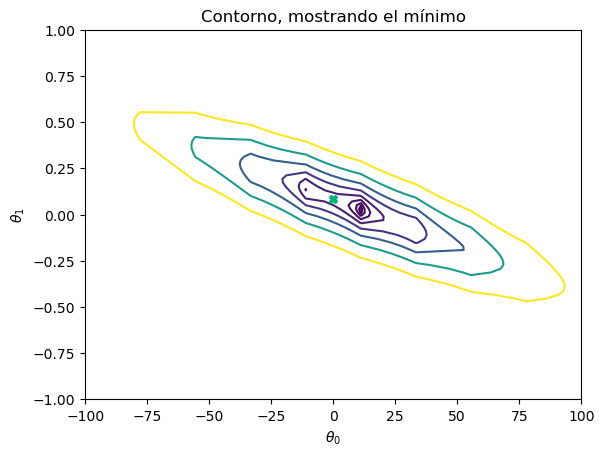

In [143]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='X', color='#00b27a');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contorno, mostrando el mínimo');
plt.show()

### 1.4 Usando sklearn

Intercepto (theta_0): [7.03259355]
Coeficiente (theta_1): [0.04753664]


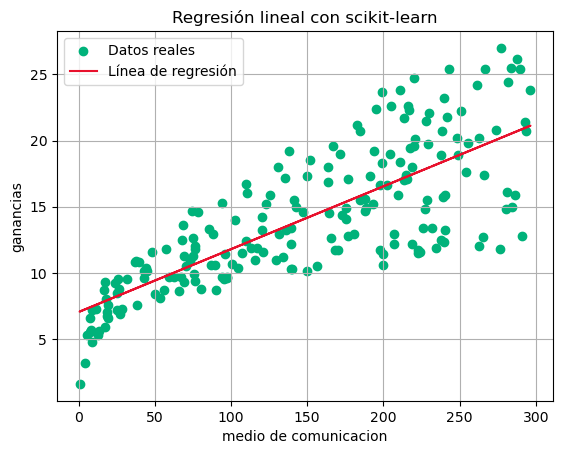

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar los datos
url = 'https://raw.githubusercontent.com/StevenB2025/Machine_learning_ejercicio_1/refs/heads/main/PUBLICIDAD_VENTAS.csv'
df = pd.read_csv(url, sep=",")


# Preparar X e y
X = df[['TV']]  # variable independiente (característica)
y = df[['SALES']]        # variable dependiente (objetivo)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Mostrar parámetros del modelo
print(f"Intercepto (theta_0): {model.intercept_}")
print(f"Coeficiente (theta_1): {model.coef_[0]}")

# Predicción de valores ajustados
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='#00b27a', label='Datos reales')
plt.plot(X, y_pred, color='#e8112d', label='Línea de regresión')
plt.xlabel('medio de comunicacion')
plt.ylabel('ganancias')
plt.title('Regresión lineal con scikit-learn')
plt.legend()
plt.grid(True)
plt.show()

### 1.4 Usando statsmodels

                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           1.47e-42
Time:                        22:10:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

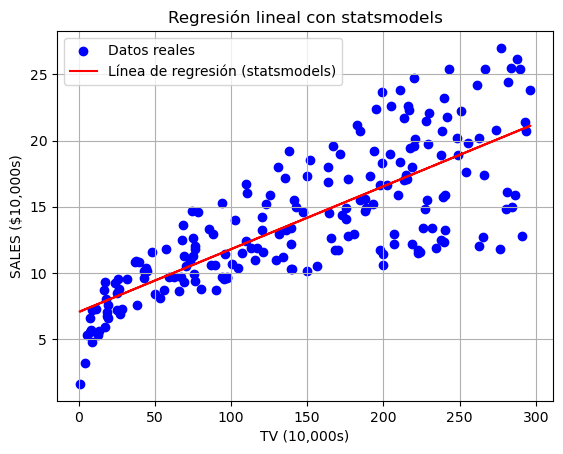

In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Cargar los datos
url = 'https://raw.githubusercontent.com/StevenB2025/Machine_learning_ejercicio_1/refs/heads/main/PUBLICIDAD_VENTAS.csv'
df = pd.read_csv(url, sep=",")
df.columns = ['ID', 'TV', 'RADIO', 'NEWSPAPER', 'SALES', 'VENTAS ALTAS Y BAJAS']


# Variable independiente (con constante añadida) y dependiente
X = sm.add_constant(df['TV'])  # Agrega una columna de 1s para el intercepto (theta_0)
y = df['SALES']

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(model.summary())

# Predicciones
df['y_pred'] = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(df['TV'], df['SALES'], color='blue', label='Datos reales')
plt.plot(df['TV'], df['y_pred'], color='red', label='Línea de regresión (statsmodels)')
plt.xlabel('TV (10,000s)')
plt.ylabel('SALES ($10,000s)')
plt.title('Regresión lineal con statsmodels')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
## Validacion de supuertos de Modelos 


Shapiro-Wilk test (normalidad):
  Estadístico: 0.9905, p-valor: 0.2133
  ✔️ Los residuos parecen normales (no se rechaza H0).

Breusch-Pagan test (homocedasticidad):
  LM Statistic: 48.0380
  LM p-value: 0.0000
  F-statistic: 62.5914
  F p-value: 0.0000
  ❌ Posible heterocedasticidad (varianza no constante).

Durbin-Watson (ya en el resumen):     0.0475


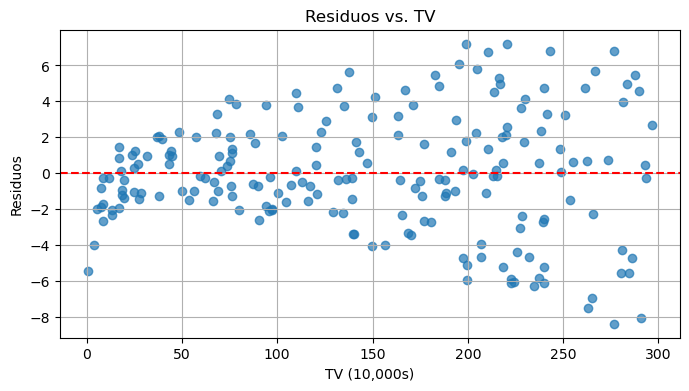

In [14]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
# Obtener residuos
residuals = model.resid

# --- 1. Normalidad de los residuos ---
shapiro_test = shapiro(residuals)
print("\nShapiro-Wilk test (normalidad):")
print(f"  Estadístico: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("  ✔️ Los residuos parecen normales (no se rechaza H0).")
else:
    print("  ❌ Los residuos no parecen normales (se rechaza H0).")

# --- 2. Homocedasticidad (varianza constante) ---
bp_test = het_breuschpagan(residuals, X)
bp_labels = ['LM Statistic', 'LM p-value', 'F-statistic', 'F p-value']
print("\nBreusch-Pagan test (homocedasticidad):")
for label, value in zip(bp_labels, bp_test):
    print(f"  {label}: {value:.4f}")
if bp_test[1] > 0.05:
    print("  ✔️ No hay evidencia fuerte de heterocedasticidad.")
else:
    print("  ❌ Posible heterocedasticidad (varianza no constante).")

# --- 3. Autocorrelación ---
print(f"\nDurbin-Watson (ya en el resumen): {model.summary().tables[1].data[2][1]}")

# --- (Opcional) Graficar residuos ---
plt.figure(figsize=(8, 4))
plt.scatter(df['TV'], residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. TV")
plt.xlabel("TV (10,000s)")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

##  Crear el Q-Q plot

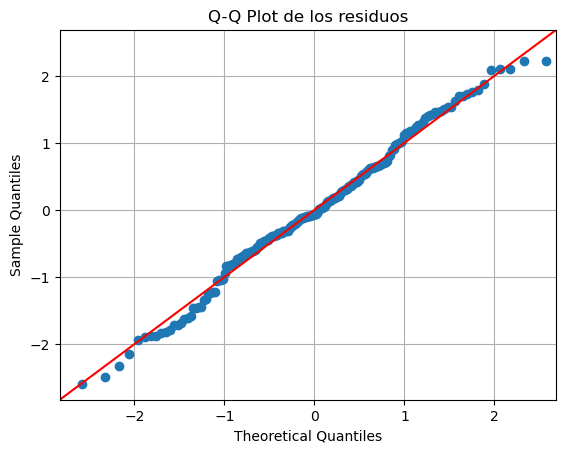

In [15]:
# Crear el Q-Q plot
sm.qqplot(residuals, line='45', fit=True)

plt.title("Q-Q Plot de los residuos")
plt.grid(True)
plt.show()

## 2. Linear Regression with Multiple Variables

> En esta parte, implementará una regresión lineal con múltiples variables para predecir los precios de las viviendas. Suponga que está vendiendo su casa y desea saber cuál sería un buen precio de mercado. Una forma de hacerlo es recopilar información sobre las casas vendidas recientemente y crear un modelo de precios de vivienda. El archivo ex1data2.txt contiene un conjunto de entrenamiento de precios de vivienda en Portland, Oregón. La primera columna representa el tamaño de la casa (en pies cuadrados), la segunda el número de habitaciones y la tercera el precio de la vivienda.

### 2.1 Feature Normalization

In [22]:
url = 'https://raw.githubusercontent.com/StevenB2025/Machine_learning_ejercicio_1/refs/heads/main/PUBLICIDAD_VENTAS.csv'
df2 = pd.read_csv(url, sep=",")
df2.columns = ['ID', 'TV', 'RADIO', 'NEWSPAPER', 'SALES', 'VENTAS ALTAS Y BAJAS']
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
RADIO,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
NEWSPAPER,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
SALES,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0
VENTAS ALTAS Y BAJAS,200.0,0.4500,0.498742,0.0,0.000,0.00,1.000,1.0


> Al observar los valores, note que los tamaños de las casas son aproximadamente 1000 veces mayores que el número de habitaciones. Cuando las características difieren por órdenes de magnitud, se realiza escalado d(escalado de características) previamente puede hacer que el descenso por gradiente converja mucho más rápido .

Podemos acelerar el descenso por gradiente si hacemos que cada uno de nuestros valores de entrada esté, idealmente, en un rango similar  $-1 \leq x_i \leq1$ or $-0.5 \leq x_i \leq0.5$.

* Escala de características: implica dividir los valores de entrada por el rango (es decir, el valor máximo menos el valor mínimo) de la variable de entrada.
* Normalización de media: implica restar el valor promedio de una variable de entrada de los valores de esa variable de entrada

$x_i := \frac{x_i - \mu_i}{s_i}$, wher $\mu_i$ is the average of all the values for features (i) and $s_i$ is the range of values (max-min), the standard deviation.

In [23]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [25]:
X_norm, mu, sigma = feature_normalize(df2[['TV', 'SALES']])

In [26]:
df2['TV_normalized'] = X_norm[:,0]
df2['SALES_normalized'] = X_norm[:,1]
df2[['TV_normalized', 'SALES_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
TV_normalized,200.0,1.287859e-16,1.0,-1.704546,-0.846406,0.031536,0.836097,1.739664
SALES_normalized,200.0,-1.865175e-16,1.0,-2.380949,-0.699095,-0.215143,0.647346,2.487323


### 2.2 Gradient Descent

La única diferencia con el problema de regresión univariada es que ahora hay una característica más en la matriz X. La función de hipótesis y la regla de actualización del descenso por gradiente por lotes permanecen sin cambios.

Nota: En el caso multivariable, la función de costo también puede escribirse en la siguiente forma vectorizada:

$$J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)$$

In [28]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [29]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

#### 2.2.1 Seleccionando Tasa de aprendizaje 

Consejos:
* Haz una gráfica con el número de iteraciones en el eje x. Ahora grafica la función de costo, $J(\theta)$, sobre el número de iteraciones del descenso por gradiente. Si $J(\theta)$ alguna vez aumenta, entonces probablemente necesites disminuir $\alpha$.
* Declara convergencia si $J(\theta)$ disminuye menos de E en una iteración, donde E es un valor pequeño como $10^{−3}$.


In [31]:
m = df2.shape[0]
X2 = np.hstack((np.ones((m,1)),X_norm))
y2 = np.array(df2.TV.values).reshape(-1,1)
theta2 = np.zeros(shape=(X2.shape[1],1))

In [37]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

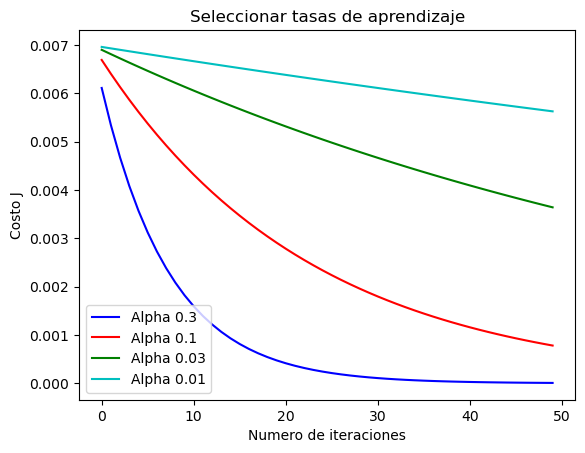

In [38]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X2, y2, theta2, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Numero de iteraciones');
plt.ylabel('Costo J');
plt.title('Seleccionar tasas de aprendizaje');
plt.legend()
plt.show()

In [35]:
iterations = 250
alpha = 0.1
theta2, J_history = gradient_descent(X2, y2, theta2, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[58.08089537]
 [29.79228022]
 [20.96766446]]


##### Estima el precio de una casa de 1650 pies cuadrados con 3 habitaciones.

In [39]:
sqft = (1650 - mu[0])/sigma[0]
bedrooms = (3 - mu[1])/sigma[1]
y_pred = theta2[0] + theta2[1]*sqft + theta2[2]*bedrooms
f'validacion entre la inversion en TV y las ventas: {y_pred[0]}$'

'validacion entre la inversion en TV y las ventas: 1646.4771929833867$'

### 2.3 Normal Equations

A closed-form solution to find $\theta$ without iteration.

$$\theta = (X^TX)^{-1}X^Ty$$

In [40]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [41]:
Xe = np.hstack((np.ones((m,1)),df2[['TV', 'SALES']].values))
theta_e = normal_eqn(Xe, y2)
theta_e

array([[-2.48618903e-11],
       [ 1.00000000e+00],
       [ 1.91424654e-12]])

In [42]:
y_pred = theta_e[0] + theta_e[1]*1650 + theta_e[2]*3
f'validacion entre la inversion en TV y las ventas: {y_pred[0]}$'

'validacion entre la inversion en TV y las ventas: 1649.9999999999238$'

### 2.4 Equivalent Code using Scikit-Learn

MAE  (Error Absoluto Medio): 2.44
MSE  (Error Cuadrático Medio): 10.20
RMSE (Raíz del Error Cuadrático Medio): 3.19
R²   (Coeficiente de determinación): 0.68


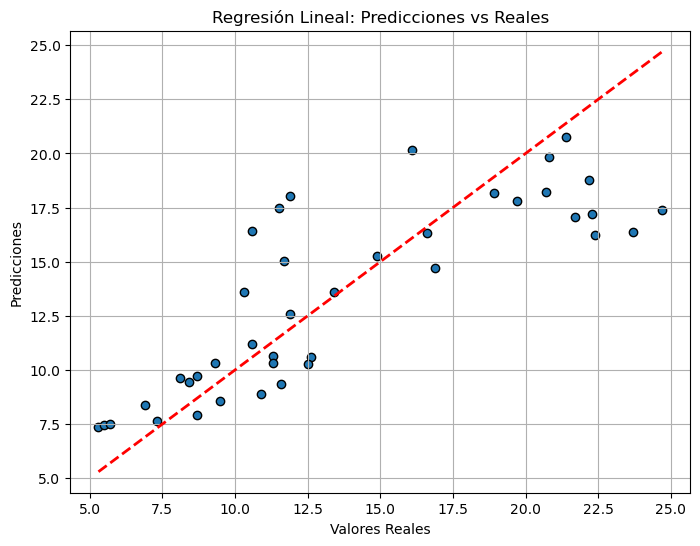

In [43]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalización (si no tienes X_norm)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# 4. Entrenar el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 5. Predicciones
y_pred = lin_reg.predict(X_test)

# 6. Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.2f}")

# 7. Visualización
# 7. Visualización de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Predicciones vs Reales')
plt.grid(True)
plt.show()

In [ ]:
### 2.5 Equivalent Code using statsmodels


                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     228.5
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           1.68e-32
Time:                        23:03:22   Log-Likelihood:                -415.93
No. Observations:                 160   AIC:                             835.9
Df Residuals:                     158   BIC:                             842.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1000      0.259     54.428      0.0

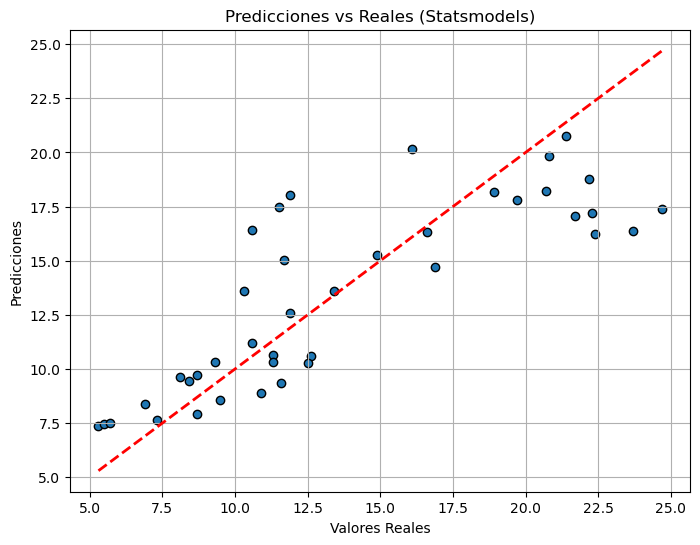

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que ya tienes X y y definidos como DataFrames o arrays
# X: variables independientes, y: variable dependiente
url = 'https://raw.githubusercontent.com/StevenB2025/Machine_learning_ejercicio_1/refs/heads/main/PUBLICIDAD_VENTAS.csv'
df = pd.read_csv(url)

# 2. Seleccionar características y objetivo
X = df[['TV']]
y = df['SALES']
# 1. División de datos (manual o con numpy)
from sklearn.model_selection import train_test_split  # solo esta parte de sklearn para dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Normalización manual (opcional, si hay variables en diferente escala)
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std  # usar media y std del train

# 3. Agregar constante (intercepto)
X_train_sm = sm.add_constant(X_train_norm)
X_test_sm = sm.add_constant(X_test_norm)

# 4. Entrenar modelo con OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# 5. Imprimir resumen estadístico
print(results.summary())

# 6. Predicciones
y_pred = results.predict(X_test_sm)

# 7. Métricas de evaluación
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print("\nEvaluación del modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.2f}")

# 8. Visualización: valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Reales (Statsmodels)')
plt.grid(True)
plt.show()


#### TAREA: realizar estos mismos ejecicion para bases de datos propias o de la web, existen muchos repositorios para tal fin